# L5: Industry Applications

* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
```
    !pip install google-generativeai
```

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import os
from dotenv import find_dotenv, load_dotenv

# Read local .env file
_ = load_dotenv(find_dotenv())

GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

In [3]:
import google.generativeai as genai
from google.api_core.client_options import ClientOptions

genai.configure(
    api_key=GOOGLE_API_KEY,
    # transport="rest",
    # client_options=ClientOptions(
    #     api_endpoint=os.getenv("GOOGLE_API_BASE"),
    # )
)

> Note: learn more about [GOOGLE_API_KEY](https://ai.google.dev/) to run it locally.

## Vision Function

In [7]:
import textwrap
import PIL.Image
from IPython.display import Markdown, Image

def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

def call_LMM(image_path: str, prompt: str, plain_text: bool=False) -> str:
    img = PIL.Image.open(image_path)

    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content([prompt, img], stream=True)
    response.resolve()

    if plain_text:
        return response.text
    else:
        return to_markdown(response.text)

## Extracting Structured Data from Retrieved Images

### Analyzing an Invoice

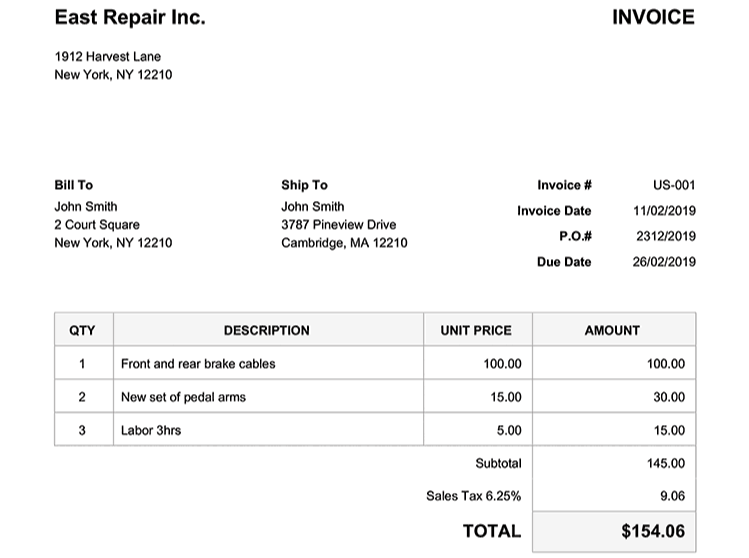

In [5]:
Image("./data/L5/invoice.png")

In [8]:
call_LMM(image_path="./data/L5/invoice.png",
         prompt="""Identify items on the invoice. Make sure you output JSON with quantity,
           description, unit price and amount.""")

> ```json
> [
>   {
>     "quantity": "1",
>     "description": "Front and rear brake cables",
>     "unit_price": "100.00",
>     "amount": "100.00"
>   },
>   {
>     "quantity": "2",
>     "description": "New set of pedal arms",
>     "unit_price": "15.00",
>     "amount": "30.00"
>   },
>   {
>     "quantity": "3",
>     "description": "Labor 3hrs",
>     "unit_price": "5.00",
>     "amount": "15.00"
>   }
> ]
> ```

In [9]:
call_LMM(image_path="./data/L5/invoice.png",
         prompt="""How much would four sets pedal arms cost
                and 6 hours of labour?""",
        plain_text=True)

'Four sets of pedal arms would cost 4 * $15 = $60.\n\nSix hours of labor would cost 6 * $5 = $30.\n\nTherefore, four sets of pedal arms and six hours of labor would cost $60 + $30 = $90.'

### Extracting Tables from Images

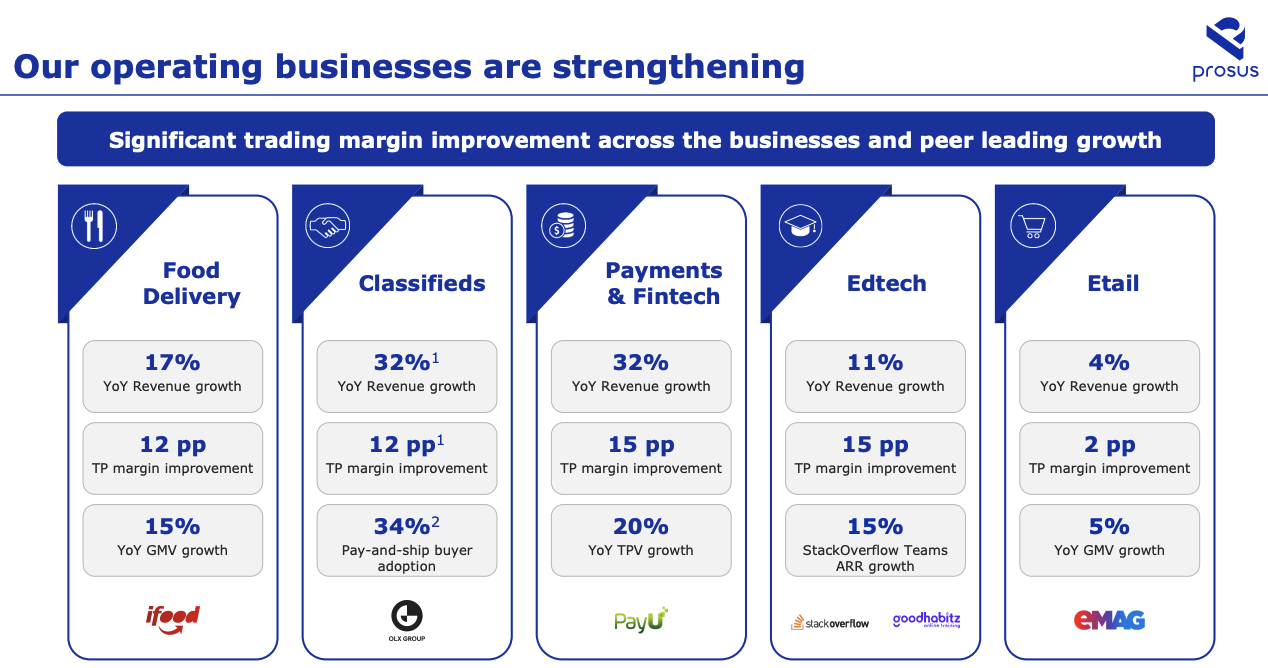

In [10]:
Image("./data/L5/prosus_table.png")

In [11]:
call_LMM(image_path="./data/L5/prosus_table.png",
         prompt="Print the contents of the table as a markdown table.")

> | Business | YoY Revenue Growth | TP Margin Improvement | YoY Growth | Brand |
> |---|---|---|---|---|
> | Food Delivery | 17% | 12 pp | 15% GMV | ifood |
> | Classifieds | 32% | 12 pp | 34% Pay-and-ship buyer adoption | OLX GROUP |
> | Payments & Fintech | 32% | 15 pp | 20% TPV | PayU |
> | Edtech | 11% | 15 pp | 15% StackOverflow Teams ARR growth | slackoverflow goodhabitz |
> | Etail | 4% | 2 pp | 5% GMV | eMAG |

In [12]:
call_LMM(image_path="./data/L5/prosus_table.png",
         prompt="""Analyse the contents of the image as a markdown table.
                    Which of the business units has the highest revenue growth?""")

> | Business Unit | YoY Revenue Growth | TP margin Improvement | YoY GMV/TPV Growth |
> |---|---|---|---|
> | Food Delivery | 17% | 12 pp | 15% |
> | Classifieds | 32% | 12 pp | 34% |
> | Payments & Fintech | 32% | 15 pp | 20% |
> | Edtech | 11% | 15 pp | 15% |
> | Etail | 4% | 2 pp | 5% |
> 
> The business unit with the highest revenue growth is **Classifieds** with a growth of 32%.

In [15]:
call_LMM(image_path="./data/L5/prosus_table.png",
         prompt="""Analyse the contents of the image as a markdown table.
                    Hpw much is the revenue growth of Food Delivery business unit?""")

> | Business Unit | YoY Revenue Growth |
> |---|---|
> | Food Delivery | 17% |
> | Classifieds | 32% |
> | Payments & Fintech | 32% |
> | Edtech | 11% |
> | Etail | 4% |

### Analyzing Flow Charts

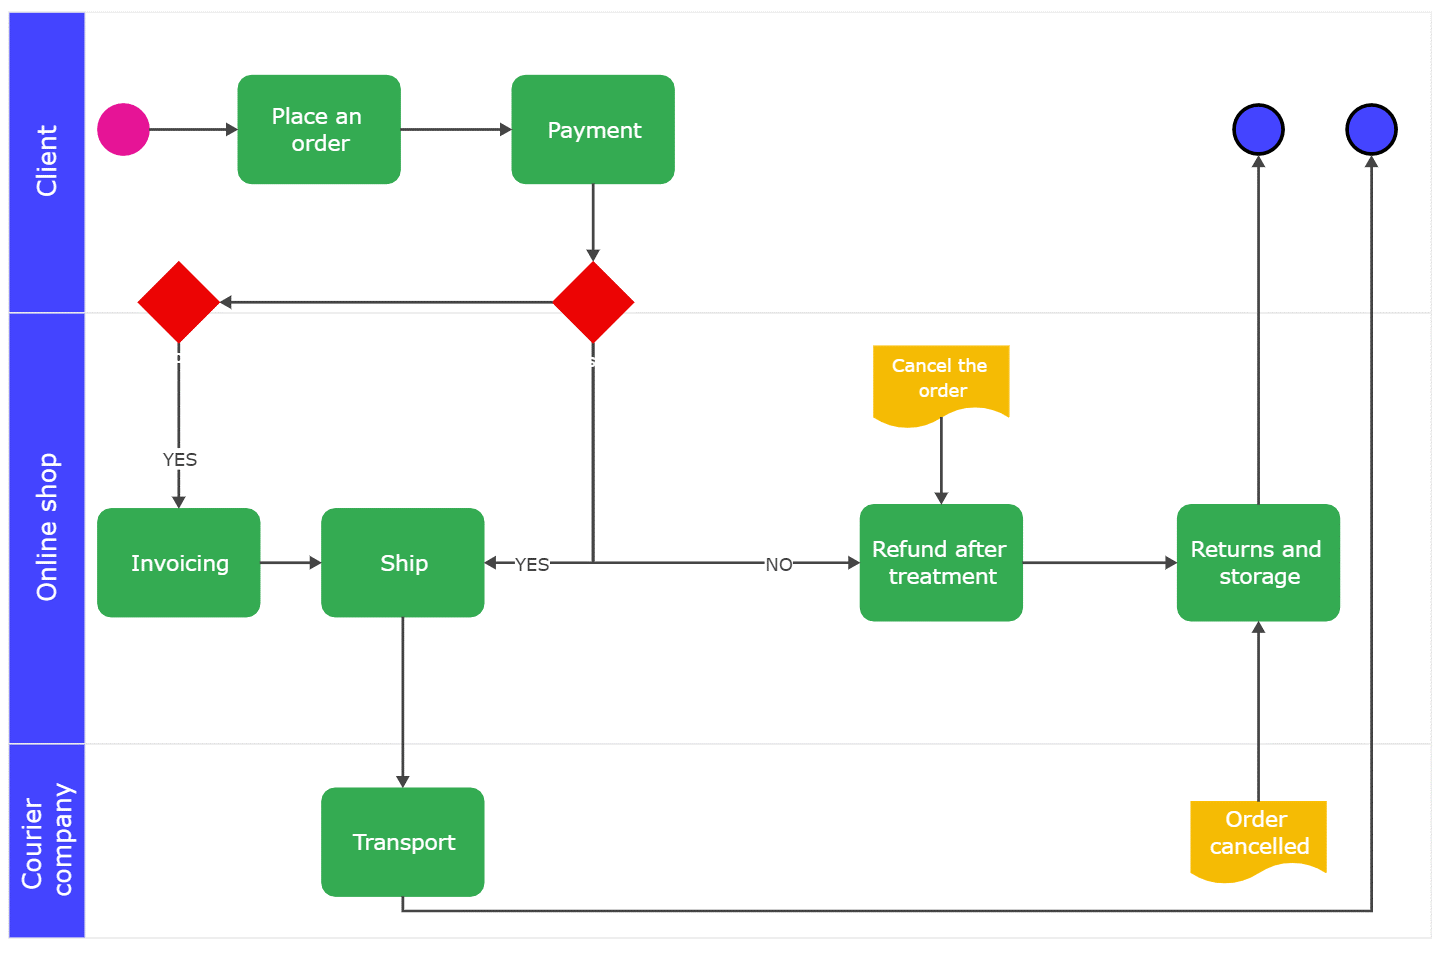

In [16]:
Image("./data/L5/swimlane-diagram-01.png")

In [17]:
call_LMM(image_path="./data/L5/swimlane-diagram-01.png",
         prompt="""Provide a summarized breakdown of the flow chart in the image
                    in a format of a numbered list.""")

> 1. The client places an order.
> 2. The client pays for the order.
> 3. If the order is successful, the online shop invoices the client.
> 4. The online shop ships the order.
> 5. The courier company transports the order.
> 6. If the client wants to cancel the order, the online shop processes a refund after the order has been processed.
> 7. If the client returns the product, it is placed in returns and storage.
> 8. The client can then receive a refund.

In [18]:
call_LMM(image_path="./data/L5/swimlane-diagram-01.png",
         prompt="""Analyse the flow chart in the image,
                    then output Python code
                    that implements this logical flow in one function""")

> ```python
> def process_order(payment_successful):
>   """
>   This function implements the logical flow of an order process
>   based on the provided flowchart.
> 
>   Args:
>     payment_successful: A boolean value indicating whether the payment
>     was successful.
> 
>   Returns:
>     A string describing the outcome of the order process.
>   """
> 
>   if payment_successful:
>     # Invoicing
>     print("Invoicing the order.")
>     # Shipping
>     print("Shipping the order.")
>     # Transportation
>     print("Transporting the order.")
>     return "Order processed successfully."
>   else:
>     # Cancel the order
>     print("Canceling the order.")
>     # Refund
>     print("Refunding the payment.")
>     return "Order cancelled."
> ```

* Test the code generate above.
> Note: please be advised that the output may include errors or the functionality may not be fully operational, as it requires additional inputs to function properly.

In [ ]:
def order_fulfillment(client, online_shop, courier_company):
   # This function takes three objects as input:
   # - client: the client who placed the order
   # - online_shop: the online shop that received the order
   # - courier_company: the courier company that will deliver the order

   # First, the client places an order.
   order = client.place_order()

   # Then, the client makes a payment for the order.
   payment = client.make_payment(order)

   # If the payment is successful, the order is shipped.
   if payment.status == "successful":
       online_shop.ship_order(order)
       courier_company.transport_order(order)
   
   # If the payment is not successful, the order is canceled.
   else:
       online_shop.cancel_order(order)
       client.refund_order(order)

   # Finally, the order is invoiced.
   online_shop.invoice_order(order)